In [2]:
import pandas as pd
df = pd.read_csv('觀光遊憩據點按縣市及遊憩據點交叉分析.csv')  # 讀取文件
#df.describe()  # 輸出基礎統計信息
df.head(5)

縣市      Unnamed: 1               遊憩據點  \
0  NaN        Location                NaN   
1  臺東縣  Taitung County  東部海岸富岡地質公園及加路蘭休憩區   
2  臺東縣  Taitung County        三仙台遊憩區及周邊地區   
3  臺東縣  Taitung County             八仙洞遊憩區   
4  臺東縣  Taitung County              綠島遊憩區   

                                          Unnamed: 3  108年7月  108年8月  108年9月  \
0                                       Scenic Spots  2019/7  2019/8  2019/9   
1  East Coast Fugang Geopark And Jialulan Recreat...   65771   51654   47709   
2   Sanxiantai recreation area and surrounding areas   64872   52134   40093   
3                       Baxian Caves Recreation Area   11551    9482   11625   
4                Lyudao（Green Island）Recreation Area   66709   35395   36840   

   108年10月  108年11月  108年12月  ...  112年11月  112年12月  113年1月  113年2月  113年3月  \
0  2019/10  2019/11  2019/12  ...  2023/11  2023/12  2024/1  2024/2  2024/3   
1    76751    40976    40877  ...    41079    46334  250299  325808  295242   
2    56200    45216    40454  ...    32781    27492  125682  217132  155958   
3    11476     8815     6124  ...     5730     4576   24792   36927   27668   
4    28644     9990     6231  ...     7542     6252    6080    9623   11879   

   113年4月  113年5月  113年6月  113年7月       小計  
0  2024/4  2024/5  2024/6  2024/7    Total  
1  227590  288382  279951  313015  4891011  
2  107730  116275  125704  146359  2994488  
3   16360   22334   22540   25166   531848  
4   27941   32058   39747   37916  1483565  

[5 rows x 66 columns]

In [3]:
# 刪除第0行，假設是包含列名錯誤行的地方
df_cleaned = df.drop(0)

# 查看是否還有 NaN 值的行，刪除包含 NaN 的行（如果需要）
df_cleaned = df_cleaned.dropna(how='all')  # 刪除全是 NaN 的行

# 如果有些列的 NaN 可以忽略，僅刪除特定列的 NaN（如 '縣市' 和 '遊憩據點'）
df_cleaned = df_cleaned.dropna(subset=['縣市', '遊憩據點'])

# 查看清理後的數據
print(df_cleaned.head())

df = df_cleaned
df.head(5)

    縣市      Unnamed: 1               遊憩據點  \
1  臺東縣  Taitung County  東部海岸富岡地質公園及加路蘭休憩區   
2  臺東縣  Taitung County        三仙台遊憩區及周邊地區   
3  臺東縣  Taitung County             八仙洞遊憩區   
4  臺東縣  Taitung County              綠島遊憩區   
5  臺東縣  Taitung County          鹿野高臺及周邊地區   

                                          Unnamed: 3  108年7月  108年8月 108年9月  \
1  East Coast Fugang Geopark And Jialulan Recreat...   65771   51654  47709   
2   Sanxiantai recreation area and surrounding areas   64872   52134  40093   
3                       Baxian Caves Recreation Area   11551    9482  11625   
4                Lyudao（Green Island）Recreation Area   66709   35395  36840   
5           Luyeh high terrace and surrounding areas  199337  117804  45159   

  108年10月 108年11月 108年12月  ... 112年11月 112年12月  113年1月  113年2月  113年3月  \
1   76751   40976   40877  ...   41079   46334  250299  325808  295242   
2   56200   45216   40454  ...   32781   27492  125682  217132  155958   
3   11476    8815    6124  ...  

縣市      Unnamed: 1               遊憩據點  \
1  臺東縣  Taitung County  東部海岸富岡地質公園及加路蘭休憩區   
2  臺東縣  Taitung County        三仙台遊憩區及周邊地區   
3  臺東縣  Taitung County             八仙洞遊憩區   
4  臺東縣  Taitung County              綠島遊憩區   
5  臺東縣  Taitung County          鹿野高臺及周邊地區   

                                          Unnamed: 3  108年7月  108年8月 108年9月  \
1  East Coast Fugang Geopark And Jialulan Recreat...   65771   51654  47709   
2   Sanxiantai recreation area and surrounding areas   64872   52134  40093   
3                       Baxian Caves Recreation Area   11551    9482  11625   
4                Lyudao（Green Island）Recreation Area   66709   35395  36840   
5           Luyeh high terrace and surrounding areas  199337  117804  45159   

  108年10月 108年11月 108年12月  ... 112年11月 112年12月  113年1月  113年2月  113年3月  \
1   76751   40976   40877  ...   41079   46334  250299  325808  295242   
2   56200   45216   40454  ...   32781   27492  125682  217132  155958   
3   11476    8815    6124  ...    5730    4576   24792   36927   27668   
4   28644    9990    6231  ...    7542    6252    6080    9623   11879   
5   51951   42533   46205  ...   30339   20427  125601  125435  117725   

   113年4月  113年5月  113年6月  113年7月       小計  
1  227590  288382  279951  313015  4891011  
2  107730  116275  125704  146359  2994488  
3   16360   22334   22540   25166   531848  
4   27941   32058   39747   37916  1483565  
5   84897   86501   96844  170764  4729290  

[5 rows x 66 columns]

## 時間序列分析：

- 分析每個月的遊客數趨勢，使用 plot() 進行可視化展示。
- 例如，繪製特定景點在不同年份的遊客數變化趨勢。

In [4]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-10-06 02:30:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.12.101, 108.177.12.100, 108.177.12.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-06 02:30:36--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-10-06 02:30:

In [5]:
df.set_index('遊憩據點', inplace=True)  # 設置景點名稱為索引
df.head(5)

縣市      Unnamed: 1  \
遊憩據點                                     
東部海岸富岡地質公園及加路蘭休憩區  臺東縣  Taitung County   
三仙台遊憩區及周邊地區        臺東縣  Taitung County   
八仙洞遊憩區             臺東縣  Taitung County   
綠島遊憩區              臺東縣  Taitung County   
鹿野高臺及周邊地區          臺東縣  Taitung County   

                                                          Unnamed: 3  108年7月  \
遊憩據點                                                                           
東部海岸富岡地質公園及加路蘭休憩區  East Coast Fugang Geopark And Jialulan Recreat...   65771   
三仙台遊憩區及周邊地區         Sanxiantai recreation area and surrounding areas   64872   
八仙洞遊憩區                                  Baxian Caves Recreation Area   11551   
綠島遊憩區                            Lyudao（Green Island）Recreation Area   66709   
鹿野高臺及周邊地區                   Luyeh high terrace and surrounding areas  199337   

                   108年8月 108年9月 108年10月 108年11月 108年12月 109年1月  ... 112年11月  \
遊憩據點                                                             ...           
東部海岸富岡地質公園及加路蘭休憩區   51654  47709   76751   40976   40877  91235  ...   41079   
三仙台遊憩區及周邊地區         52134  40093   56200   45216   40454  57901  ...   32781   
八仙洞遊憩區               9482  11625   11476    8815    6124  14833  ...    5730   
綠島遊憩區               35395  36840   28644    9990    6231  12699  ...    7542   
鹿野高臺及周邊地區          117804  45159   51951   42533   46205  64624  ...   30339   

                  112年12月  113年1月  113年2月  113年3月  113年4月  113年5月  113年6月  \
遊憩據點                                                                        
東部海岸富岡地質公園及加路蘭休憩區   46334  250299  325808  295242  227590  288382  279951   
三仙台遊憩區及周邊地區         27492  125682  217132  155958  107730  116275  125704   
八仙洞遊憩區               4576   24792   36927   27668   16360   22334   22540   
綠島遊憩區                6252    6080    9623   11879   27941   32058   39747   
鹿野高臺及周邊地區           20427  125601  125435  117725   84897   86501   96844   

                   113年7月       小計  
遊憩據點                                
東部海岸富岡地質公園及加路蘭休憩區  313015  4891011  
三仙台遊憩區及周邊地區        146359  2994488  
八仙洞遊憩區              25166   531848  
綠島遊憩區               37916  1483565  
鹿野高臺及周邊地區          170764  4729290  

[5 rows x 65 columns]

<Axes: >

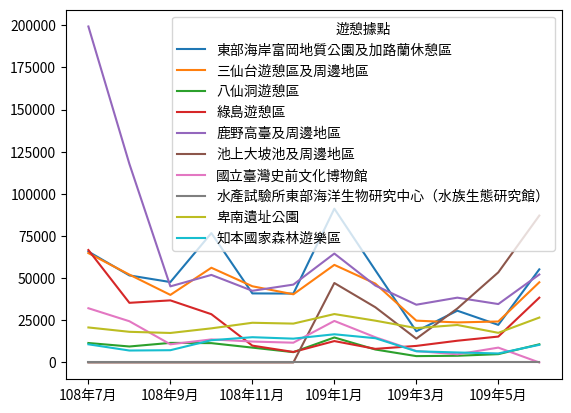

In [6]:

#df.T.plot()  # 畫出時間序列圖，按月展示各景點的遊客數

# 確保數值列，從第5列開始是數值列
df_numeric = df.iloc[:10, 3:3+12]  # 選擇數值列

# 將字符串轉換為數值，強制轉換錯誤項為 NaN
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# 處理缺失值，例如用 0 填充
df_numeric.fillna(0, inplace=True)

# 將數據轉置並繪製圖表
df_numeric.T.plot()

## 按年匯總遊客數：

- 匯總各景點每年的總遊客數，查看哪個年份的遊客最多。
- 可以通過篩選列名和 groupby() 方法按年份分組。

In [7]:
# 將中華民國年份轉換為公歷年份，並使用 pd.to_datetime 進行日期解析
def convert_to_gregorian(date_str):
    #print(date_str)
    date_str = date_str.strip('月')
    year_str, month_str = date_str.split('年')
    roc_year = int(year_str)  # 中華民國年份
    gregorian_year = roc_year + 1911  # 轉換為公歷年
    #print(f'{gregorian_year}年{month_str}月')
    return f'{gregorian_year}/{month_str}'

# 轉換列名中的中華民國年為公歷年
new_columns = [convert_to_gregorian(col) for col in df.columns[3:-1]]

# 將轉換後的年份設置為列名
df.columns = list(df.columns[:3]) + new_columns + list(df.columns[-1:])

# 查看結果
df.head(5)



縣市      Unnamed: 1  \
遊憩據點                                     
東部海岸富岡地質公園及加路蘭休憩區  臺東縣  Taitung County   
三仙台遊憩區及周邊地區        臺東縣  Taitung County   
八仙洞遊憩區             臺東縣  Taitung County   
綠島遊憩區              臺東縣  Taitung County   
鹿野高臺及周邊地區          臺東縣  Taitung County   

                                                          Unnamed: 3  2019/7  \
遊憩據點                                                                           
東部海岸富岡地質公園及加路蘭休憩區  East Coast Fugang Geopark And Jialulan Recreat...   65771   
三仙台遊憩區及周邊地區         Sanxiantai recreation area and surrounding areas   64872   
八仙洞遊憩區                                  Baxian Caves Recreation Area   11551   
綠島遊憩區                            Lyudao（Green Island）Recreation Area   66709   
鹿野高臺及周邊地區                   Luyeh high terrace and surrounding areas  199337   

                   2019/8 2019/9 2019/10 2019/11 2019/12 2020/1  ... 2023/11  \
遊憩據點                                                             ...           
東部海岸富岡地質公園及加路蘭休憩區   51654  47709   76751   40976   40877  91235  ...   41079   
三仙台遊憩區及周邊地區         52134  40093   56200   45216   40454  57901  ...   32781   
八仙洞遊憩區               9482  11625   11476    8815    6124  14833  ...    5730   
綠島遊憩區               35395  36840   28644    9990    6231  12699  ...    7542   
鹿野高臺及周邊地區          117804  45159   51951   42533   46205  64624  ...   30339   

                  2023/12  2024/1  2024/2  2024/3  2024/4  2024/5  2024/6  \
遊憩據點                                                                        
東部海岸富岡地質公園及加路蘭休憩區   46334  250299  325808  295242  227590  288382  279951   
三仙台遊憩區及周邊地區         27492  125682  217132  155958  107730  116275  125704   
八仙洞遊憩區               4576   24792   36927   27668   16360   22334   22540   
綠島遊憩區                6252    6080    9623   11879   27941   32058   39747   
鹿野高臺及周邊地區           20427  125601  125435  117725   84897   86501   96844   

                   2024/7       小計  
遊憩據點                                
東部海岸富岡地質公園及加路蘭休憩區  313015  4891011  
三仙台遊憩區及周邊地區        146359  2994488  
八仙洞遊憩區              25166   531848  
綠島遊憩區               37916  1483565  
鹿野高臺及周邊地區          170764  4729290  

[5 rows x 65 columns]

In [8]:
# 假設 df 是你的數據
# 重置索引以便於使用 melt
df.reset_index(inplace=True)

In [9]:


# 使用 melt 將 DataFrame 轉換為長表格形式
df_melted = df.melt(id_vars=[ '遊憩據點','縣市', 'Unnamed: 1',  'Unnamed: 3'],
                    var_name='日期', value_name='遊客數')

# 提取年份，並將其轉換為整數
df_melted['年份'] = pd.to_datetime(df_melted['日期'], format='%Y/%m', errors='coerce').dt.year

# 清理遊客數，去除空格，替換缺失值為0，並轉換為整數
df_melted['遊客數'] = df_melted['遊客數'].str.replace(' ', '').astype(float).fillna(0).astype(int)

# 按年份和縣市匯總遊客數
yearly_summary = df_melted.groupby(['年份', '縣市'])['遊客數'].sum().reset_index()

# 輸出年度遊客匯總
print(yearly_summary)




        年份   縣市      遊客數
0   2019.0  澎湖縣  1078230
1   2019.0  臺東縣  2252138
2   2019.0  連江縣   104146
3   2019.0  金門縣  1259090
4   2020.0  澎湖縣  2297200
5   2020.0  臺東縣  5387399
6   2020.0  連江縣   195447
7   2020.0  金門縣  1567326
8   2021.0  澎湖縣   974258
9   2021.0  臺東縣  3341710
10  2021.0  連江縣    85131
11  2021.0  金門縣   807956
12  2022.0  澎湖縣  1825779
13  2022.0  臺東縣  4642382
14  2022.0  連江縣   188233
15  2022.0  金門縣  1233828
16  2023.0  澎湖縣  1947021
17  2023.0  臺東縣  5313860
18  2023.0  連江縣   188049
19  2023.0  金門縣  1496093
20  2024.0  澎湖縣  1503488
21  2024.0  臺東縣  7226442
22  2024.0  連江縣    84706
23  2024.0  金門縣   805792


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

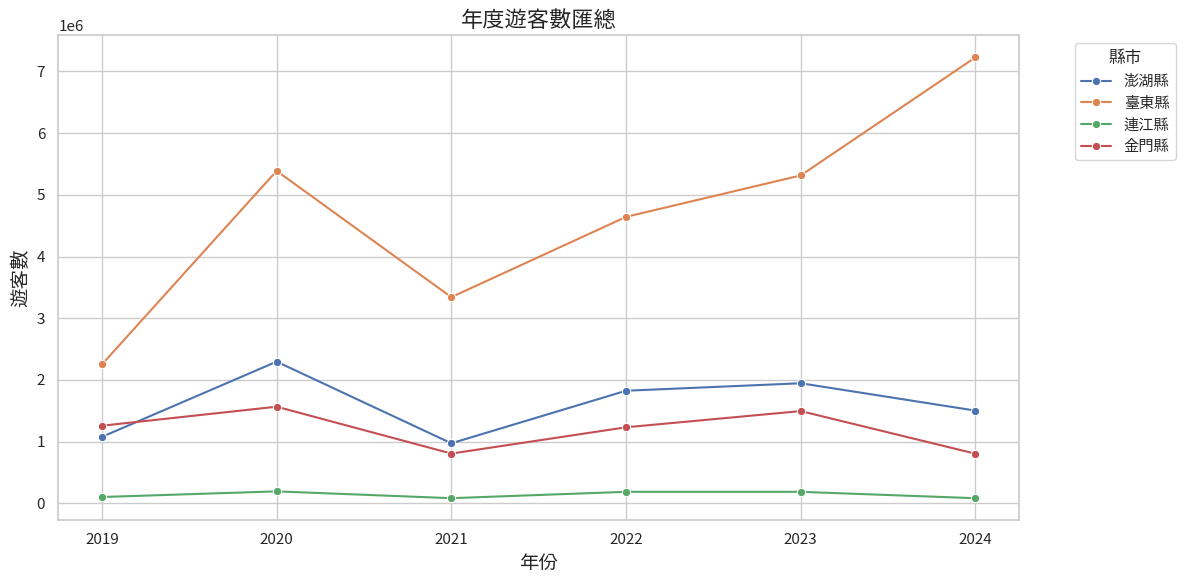

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 設置圖形風格
sns.set(style='whitegrid')

# 改style要在改font之前
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

# 創建圖形
plt.figure(figsize=(12, 6))

# 使用 seaborn 的線性圖繪製每個縣市的年度遊客數
sns.lineplot(data=yearly_summary, x='年份', y='遊客數', hue='縣市', marker='o')

# 添加標題和標籤
plt.title('年度遊客數匯總', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('遊客數', fontsize=14)
plt.xticks(yearly_summary['年份'].unique())  # 確保每個年份都顯示
plt.legend(title='縣市', bbox_to_anchor=(1.05, 1), loc='upper left')

# 顯示圖形
plt.tight_layout()
plt.show()

In [11]:
# 按年度匯總每年的遊客數
df_yearly_summary = df_melted.groupby('年份')['遊客數'].sum().reset_index()

# 找出遊客數最多的年份
max_year = df_yearly_summary[df_yearly_summary['遊客數'] == df_yearly_summary['遊客數'].max()]

# 打印匯總結果和最多遊客的年份
print(df_yearly_summary)
print("遊客最多的年份是：")
print(max_year)

       年份      遊客數
0  2019.0  4693604
1  2020.0  9447372
2  2021.0  5209055
3  2022.0  7890222
4  2023.0  8945023
5  2024.0  9620428
遊客最多的年份是：
       年份      遊客數
5  2024.0  9620428


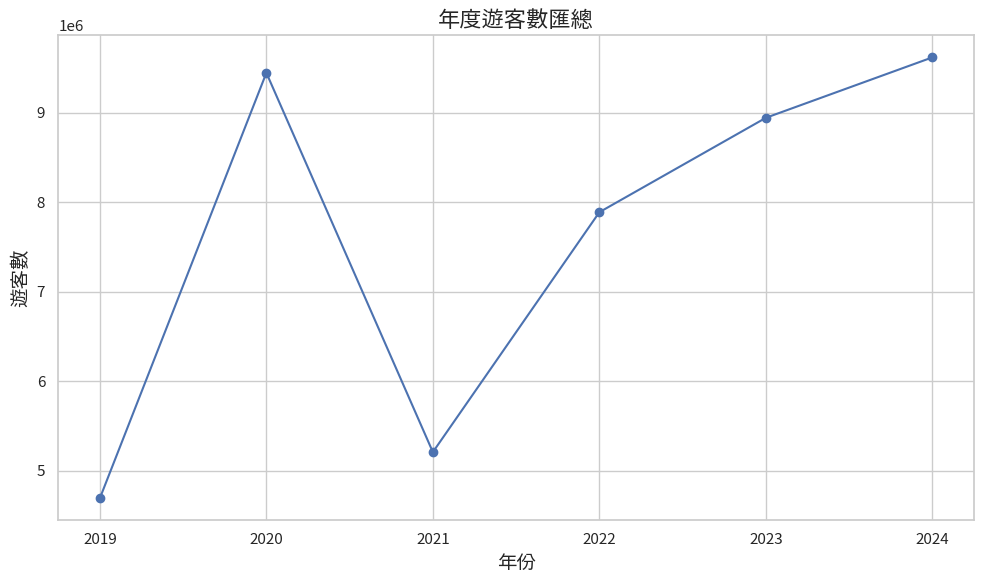

In [12]:
# 創建圖形
plt.figure(figsize=(10, 6))

# 繪製折線圖
plt.plot(df_yearly_summary['年份'], df_yearly_summary['遊客數'], marker='o', linestyle='-', color='b')

# 添加標題和標籤
plt.title('年度遊客數匯總', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('遊客數', fontsize=14)

# 設置 x 軸為整數年份
plt.xticks(df_yearly_summary['年份'].astype(int))

# 顯示網格
plt.grid(True)

# 顯示圖形
plt.tight_layout()
plt.show()

## 區域匯總：

- 匯總不同區域（如縣市）的遊客總數，查看哪個縣市的遊客最多。
- 使用 groupby() 函數按「縣市」進行分組統計。

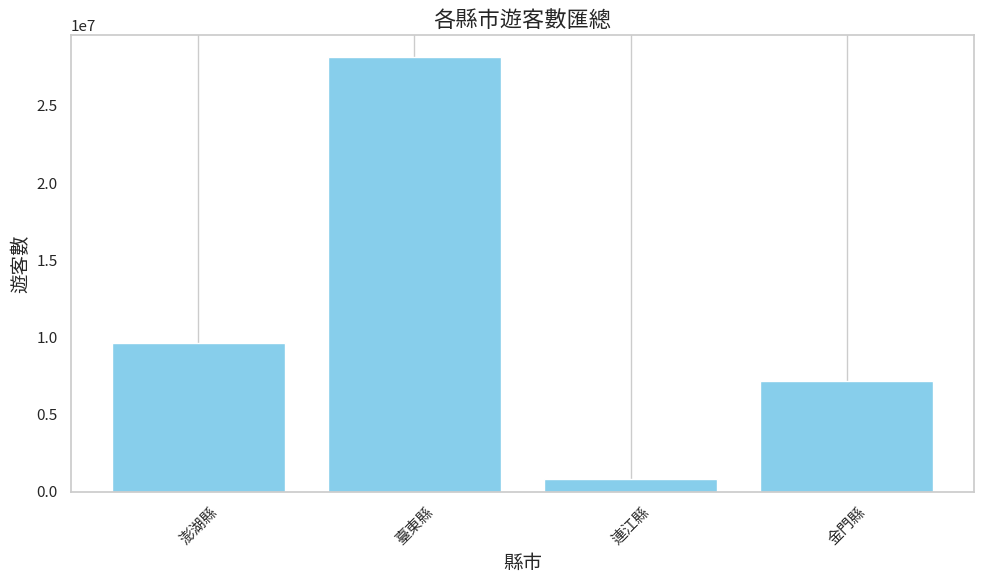

In [13]:
# 將月份列轉換為數值並匯總
months = df.columns[3:-1]  # 獲取所有月份的列
df[months] = df[months].apply(pd.to_numeric, errors='coerce')  # 轉換為數值

# 按縣市匯總遊客數
county_summary = df.groupby('縣市')[months].sum().reset_index()

# 計算小計
county_summary['小計'] = county_summary[months].sum(axis=1)

# 創建圖形
plt.figure(figsize=(10, 6))

# 使用條形圖繪製每個縣市的遊客數總和
plt.bar(county_summary['縣市'], county_summary['小計'], color='skyblue')

# 添加標題和標籤
plt.title('各縣市遊客數匯總', fontsize=16)
plt.xlabel('縣市', fontsize=14)
plt.ylabel('遊客數', fontsize=14)

# 顯示網格
plt.grid(axis='y')

# 顯示圖形
plt.xticks(rotation=45)  # 旋轉 x 軸標籤以避免重疊
plt.tight_layout()
plt.show()

## 景點間的遊客差異分析：

- 比較各個景點在特定時間段內的遊客差異，可以使用箱線圖或柱狀圖進行可視化。

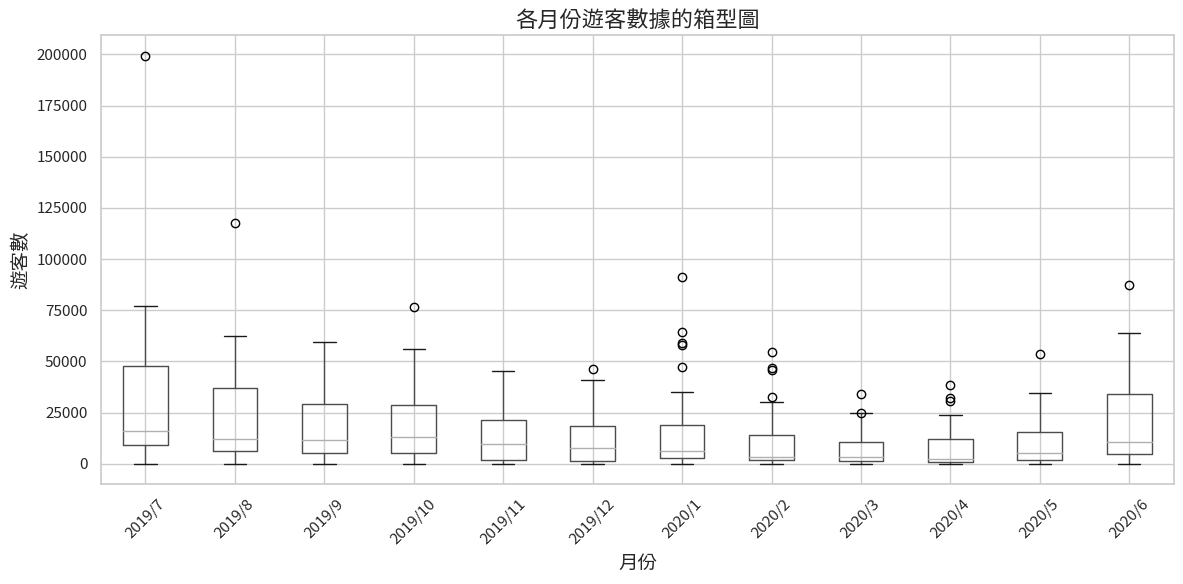

In [14]:
# 繪製箱型圖
plt.figure(figsize=(12, 6))
df.boxplot(column=list(df.columns[4:4+12]))

# 添加標題和標籤
plt.title('各月份遊客數據的箱型圖', fontsize=16)
plt.xlabel('月份', fontsize=14)
plt.ylabel('遊客數', fontsize=14)

# 顯示圖形
plt.xticks(rotation=45)  # 旋轉 x 軸標籤
plt.tight_layout()
plt.show()

# 可以住哪裡？

In [15]:
import json

with open('HotelList.json', 'r', encoding='utf-8-sig') as file:
    data = json.load(file)

# 將 JSON 轉換為 DataFrame
hotels_df = pd.json_normalize(data['Hotels'])

# 用戶輸入的城市名稱
user_input_city = input("請輸入城市名稱（例如：臺東縣）：")

# 篩選並列出相應的旅館名稱
matching_hotels = hotels_df[hotels_df['PostalAddress.City'] == user_input_city]

if not matching_hotels.empty:
    print("在", user_input_city, "的旅館有：")
    print(matching_hotels['HotelName'].to_string(index=False))
else:
    print("未找到", user_input_city, "的旅館。")


請輸入城市名稱（例如：臺東縣）：臺東縣
在 臺東縣 的旅館有：
               凱旋新宿商旅
               觀關嚮戶民宿
                克卜勒民宿
             初鹿生態農莊民宿
                 安德飯店
                 樂活民宿
               塔羅之昕民宿
               月光莊園民宿
                瑪拉松民宿
              艾蜜麗庭園別墅
                 東金民宿
                 雀屏山莊
                消防情民宿
               東糖29民宿
                 宛美民宿
               莊稼熟了參館
                比砂麓民宿
               椰林風情民宿
                嘟嘟好民宿
                三又木民宿
               台東四季民宿
               鴻瑞輕旅二館
             畫日風尚休閒會館
                 蘭舍民宿
               英惠原藝民宿
                佳美髮民宿
                紫亭賞民宿
               碧海青天民宿
              忘憂﹝如意﹞館
               馬卡巴嗨文創
               沐月心宿民宿
               睿凡的家民宿
             如意曙光渡假酒店
               地久天長民宿
                 甲穩民宿
                 建華旅社
                稻鄉海民宿
               筆令莊園民宿
                 明品民宿
              娜路彎銀河行館
                 櫻花民宿
             日安艸木公寓民宿
               托斯卡尼民宿
                 怡靜民宿


In [16]:


# 用戶輸入的服務資訊關鍵字
user_input_service = input("請輸入想要的服務資訊關鍵字（例如：自行車友善）：")
matching_hotels_city = matching_hotels
# 進一步篩選包含服務資訊的旅館
matching_hotels = matching_hotels_city[
    matching_hotels_city['ServiceInfo'].str.contains(user_input_service, na=False)
]

if not matching_hotels.empty:
    print("在", user_input_city, "的符合條件的旅館有：")
    print(matching_hotels[['HotelName', 'ServiceInfo']].to_string(index=False))
else:
    print("未找到在", user_input_city, "符合服務資訊的旅館。")

請輸入想要的服務資訊關鍵字（例如：自行車友善）：自行車友善
在 臺東縣 的符合條件的旅館有：
        HotelName                                                                                                                                                                                         ServiceInfo
           凱旋新宿商旅                                                                                                                                                餐廳,無線網路,國民旅遊卡,停車場,,,,郵電服務,商務旅遊中心,自行車租借,AED,,,自行車友善旅宿
           觀關嚮戶民宿                                                                                                                                                                                             自行車友善旅宿
             樂活民宿                                                                                                                                                                          停車場,餐廳,有線網路,溫泉設施,,,自行車友善旅宿
           塔羅之昕民宿                                                                                

In [17]:

# 用戶輸入的預算範圍
user_input_budget = int(input("請輸入預算（例如：2500）："))

# 最後篩選符合預算範圍的旅館
final_matching_hotels = matching_hotels[
    (matching_hotels['LowestPrice'] <= user_input_budget) &
    (matching_hotels['CeilingPrice'] >= user_input_budget)
]

if not final_matching_hotels.empty:
    print("在", user_input_city, "的符合 ",user_input_service," 條件的旅館有：")
    print(final_matching_hotels[['HotelName','LowestPrice', 'CeilingPrice',  'ServiceInfo']].to_string(index=False))
else:
    print("未找到在", user_input_city, "符合服務資訊和預算的旅館。")

請輸入預算（例如：2500）：2500
在 臺東縣 的符合  自行車友善  條件的旅館有：
        HotelName  LowestPrice  CeilingPrice                                                                                                                                                                           ServiceInfo
          艾蜜麗庭園別墅         1500          3500                                                                                                                                                                               自行車友善旅宿
            消防情民宿         1500          4200                                                                                                                          無線網路,iTaiwan,國民旅遊卡,停車場,自助洗衣(免費),,,,洗衣服務,接送服務,自行車租借,,,自行車友善旅宿
            玉蟾園民宿         1800          3600                                                                                                                                          停車場,餐廳,有線網路,國民旅遊卡,,,自行車租借,導覽解說,體驗活動,,自行車友善旅宿
           伊豆花園民宿         1800          2600  